# Analysis 2


In [26]:
import json
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
import mplfinance as mpf

Load file


In [27]:
with open('../data-dump/account-candles-XAU_USD-D.json', 'r', encoding='UTF8') as in_file:
    json_data = json.load(in_file)


In [28]:
instrument = json_data['instrument']
granularity = json_data['granularity']
candles = json_data['candles']

print(f"Instrument: [ {instrument} ], Granularity: [ {granularity} ]")


Instrument: [ XAU_USD ], Granularity: [ D ]


In [29]:
flatten_data = [
    [ 
        datetime.strptime(x['time'], "%Y-%m-%dT%H:%M:%S.%f000Z"), 
        bool(x['complete']), 
        int(x['volume']), 
        float(x['mid']['o']), 
        float(x['mid']['h']), 
        float(x['mid']['l']), 
        float(x['mid']['c'])
    ] for x in candles]
df = pd.DataFrame(
    flatten_data, 
    columns=['time','complete', 'Volume', 'Open', 'High', 'Low', 'Close'])

print(f"df shape: {df.shape}")

# print(df.info())

df shape: (500, 7)


In [39]:
df['ma'] = df['Close'].rolling(20).mean()
df['ewm'] = df['Close'].ewm(span=20, adjust=False).mean()
# df.head(30)
index_df = df.set_index('time')
index_df.tail(28)

,complete,Volume,Open,High,Low,Close,ma,ewm
time,,,,,,,,
2022-06-14 21:00:00,True,172882,1807.605,1841.965,1807.561,1833.970,1847.76735,1846.381250
2022-06-15 21:00:00,True,165280,1833.655,1857.636,1815.655,1856.825,1848.49860,1847.375893
2022-06-16 21:00:00,True,130672,1854.555,1854.765,1833.905,1840.400,1848.18785,1846.711522
2022-06-19 21:00:00,True,66274,1837.645,1846.165,1834.857,1838.395,1847.42435,1845.919473
2022-06-20 21:00:00,True,92295,1837.745,1843.669,1828.634,1833.060,1845.75135,1844.694761
2022-06-21 21:00:00,True,105351,1832.670,1847.930,1823.455,1837.780,1844.97860,1844.036212
2022-06-22 21:00:00,True,126193,1837.925,1846.128,1822.590,1822.680,1843.57110,1842.002287
2022-06-23 21:00:00,True,123759,1823.890,1831.870,1816.980,1827.310,1842.27560,1840.603022
2022-06-26 21:00:00,True,103956,1835.085,1841.105,1820.841,1822.735,1840.62235,1838.901306


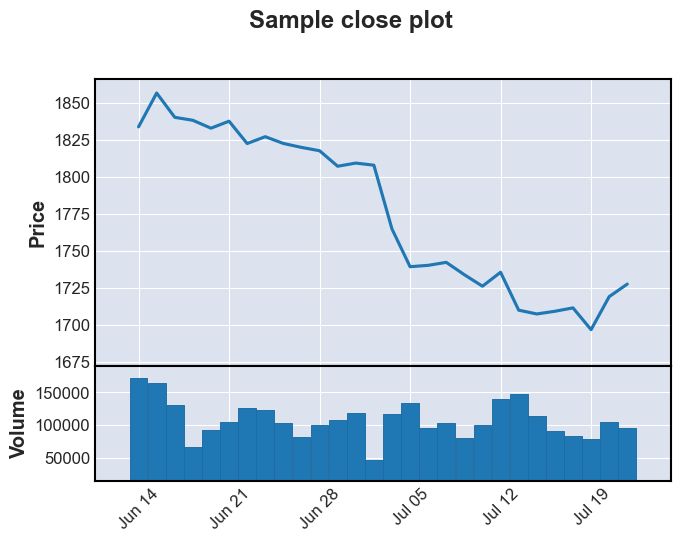

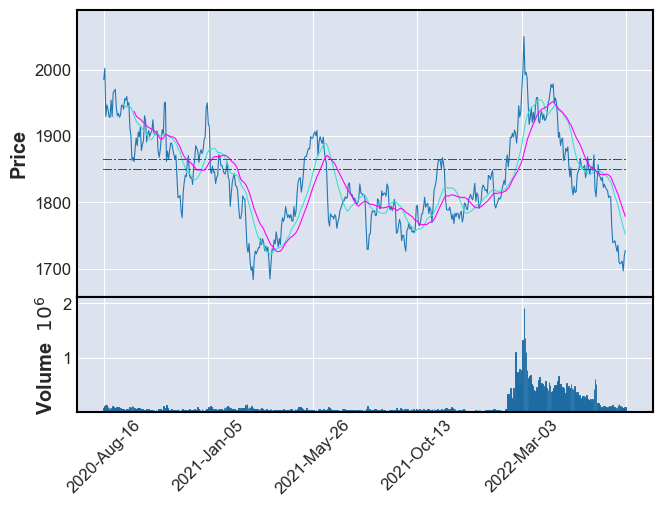

In [45]:
# This plots close
mpf.plot(index_df.tail(28),type='line', volume=True, title='Sample close plot')

mpf.plot(index_df, type='line', 
    mav=(20, 30),
    hlines=dict(hlines=[1850,1865],colors=['g','r'],linestyle='-.',linewidths=(1,1)),
    volume=True)
    

In [32]:
# https://github.com/matplotlib/mplfinance
dfx = df.tail(50).set_index('time')
dfx

,complete,Volume,Open,High,Low,Close,ma,ewm
time,,,,,,,,
2022-05-15 21:00:00,True,488596,1811.635,1826.987,1786.778,1824.590,1882.39200,1873.055668
2022-05-16 21:00:00,True,381150,1825.055,1836.164,1812.907,1814.965,1875.65150,1867.523223
2022-05-17 21:00:00,True,335769,1814.565,1824.849,1807.315,1816.445,1868.59650,1862.658631
2022-05-18 21:00:00,True,382620,1816.670,1849.159,1810.905,1842.200,1863.12525,1860.710190
2022-05-19 21:00:00,True,288011,1841.925,1849.491,1832.399,1846.615,1858.83850,1859.367791
2022-05-22 21:00:00,True,315403,1848.340,1865.531,1843.538,1853.665,1856.61950,1858.824668
2022-05-23 21:00:00,True,231157,1853.775,1869.750,1849.370,1866.520,1854.67300,1859.557556
2022-05-24 21:00:00,True,273721,1865.500,1868.113,1841.549,1853.235,1853.04675,1858.955408
2022-05-25 21:00:00,True,308235,1852.990,1854.435,1840.755,1850.830,1850.86550,1858.181560


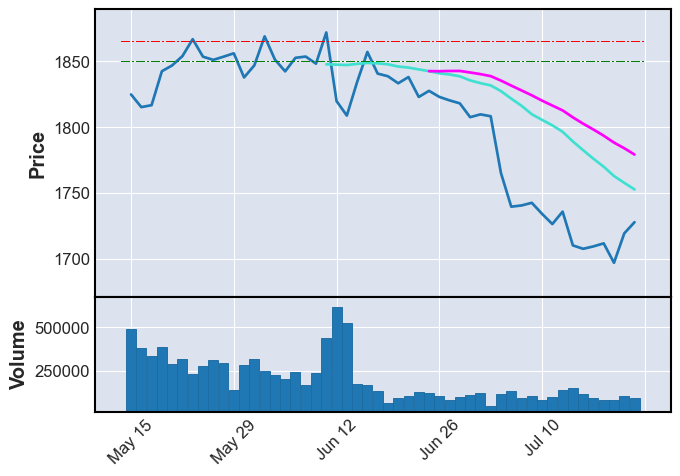

In [33]:
mpf.plot(dfx, type='line', 
    mav=(20, 30),
    hlines=dict(hlines=[1850,1865],colors=['g','r'],linestyle='-.',linewidths=(1,1)),
    volume=True)
    

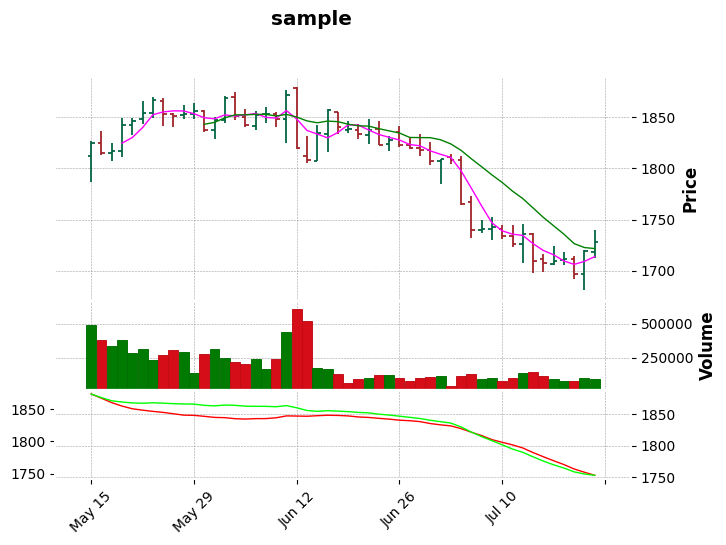

In [34]:
ap0 = [ 
    mpf.make_addplot(dfx['ma'],color='r', width=1, panel=2),  # uses panel 0 by default
    mpf.make_addplot(dfx['ewm'],color='lime', width=1, panel=2),  # uses panel 0 by default
    #mpf.make_addplot(dfx['Volume'],type='line',color='lime', linestyle=' ',panel =1, mav = (4, 12))
    ]

#  mpf.available_styles()


mc = mpf.make_marketcolors(up='g',down='r',
                           edge='lime',
                           wick={'up':'blue','down':'orange'},
                           volume='gray',
                           ohlc='black')
s  = mpf.make_mpf_style(
    base_mpf_style='charles',
    mavcolors=['fuchsia','g','r'],
    #mavcolors=['#1f77b4','#ff7f0e','#2ca02c'],
    #marketcolors=mc
    )

mpf.plot(dfx, type='ohlc',
    mav=(4, 12),
    volume=True, 
    addplot=ap0, 
    style=s, 
    title="sample", 
    linecolor='indigo', update_width_config=dict(line_width=1))

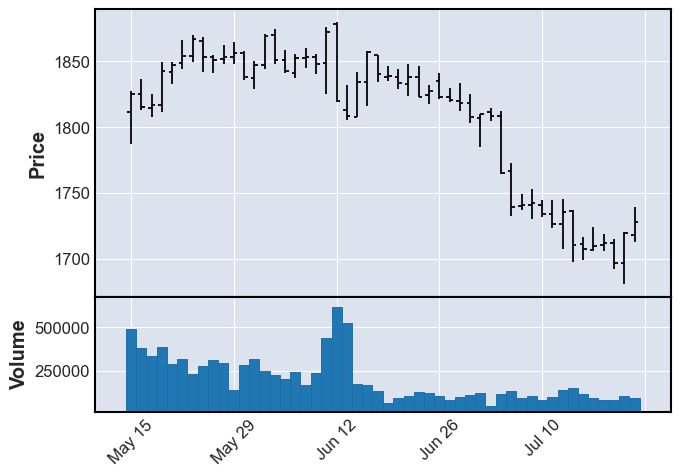

In [35]:
mpf.plot(dfx,volume=True)


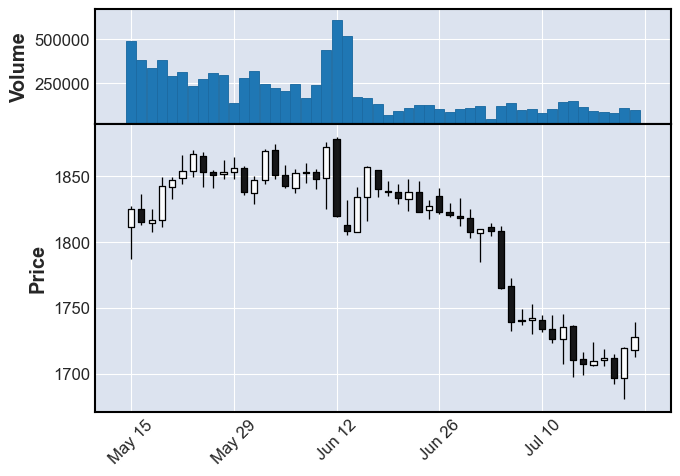

In [36]:
mpf.plot(dfx,type='candle',volume=True,main_panel=1,volume_panel=0)